# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Importing relevant libraries/dependencies
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Setting up Splinter/opening an automated Chrome browser via Splinter
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the Mars weather data website in the automated browser
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Creating a Beautiful Soup object and confirming the page was properly parsed
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [5]:
# Extracting all rows of data from the table
all_rows = soup.find('table', class_ = 'table')
all_rows

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Creating an empty list to store the rows of data
all_data_lists = []

# Looping through the scraped data to create a list of rows
data_rows = all_rows.find_all('tr', class_ = 'data-row')
for row in data_rows:
    data_list = []
    for data in row.find_all('td'):
        data_list.append(data.text)
    if data_list:
        all_data_lists.append(data_list)

# Confirming creation of the list of lists
all_data_lists

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Creating a list of the column names using a 'for' loop
th_elements = all_rows.find_all('th')
column_names = []
for th in th_elements:
    column_name = th.text
    column_names.append(column_name)

# Confirming creation of the column names list    
column_names

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
# Creating a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(all_data_lists, columns = column_names)

In [9]:
# Confirming the DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examining the data type of each column
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Changing the data types for analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [12]:
# Confirming type changes were successful by examining data types again
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# Question 1. How many months are there on Mars?
# Answer: 12 months
mars_weather_df['month'].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [14]:
# Question 2. How many Martian days' worth of data are there?
# Answer: 1867
len(mars_weather_df['sol'].unique())

1867

In [15]:
# Question 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Answer: Month 3 is the coldest and month 8 is the warmest, at the location of Curiosity
# See below for support of this answer

# To answer this, we first need to determine the average low temperature by month
groupby_month = mars_weather_df.groupby(['month'])
avg_low_temp_by_month = groupby_month['min_temp'].mean()
avg_low_temp_by_month

# A visual inspection of the numbers tells us that month 3 is the coldest and month 8 is the warmest
# But we'll visualize this better with a bar chart

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

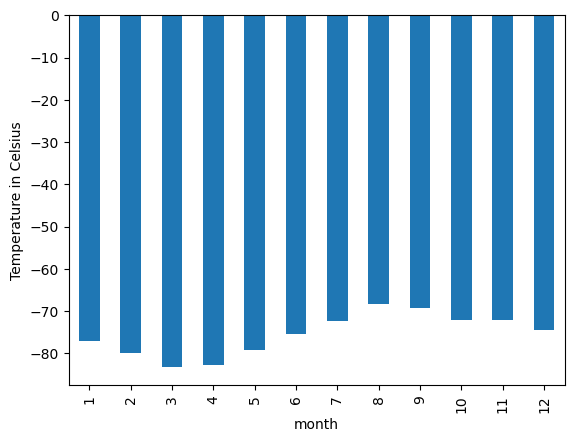

In [16]:
# Plotting the average temperature by month
plt.bar(x = avg_low_temp_by_month.index, height = avg_low_temp_by_month, width = 0.5)
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.xticks(ticks = avg_low_temp_by_month.index, rotation = 'vertical')
plt.xlim(0.5, 12.5)
plt.show()

# Again, a visual inspection of the bar chart tells us that month 3 is the coldest and month 8 is the warmest
# But we'll create one more bar chart to visualize this better

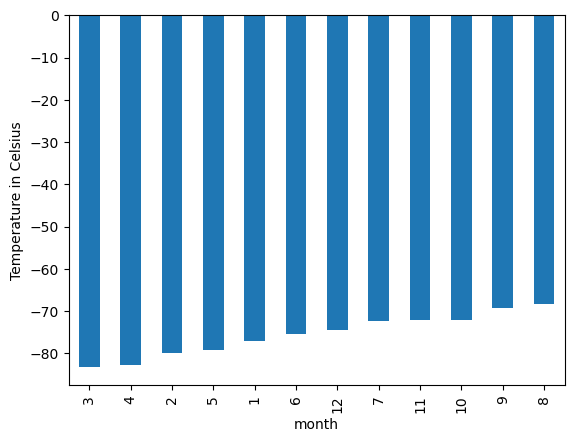

In [17]:
# Plotting the average temperature by month in ASCENDING order
asc_avg_low_temp_by_month = avg_low_temp_by_month.sort_values().reset_index()
plt.bar(x = asc_avg_low_temp_by_month.index,
        height = asc_avg_low_temp_by_month['min_temp'],
        tick_label = asc_avg_low_temp_by_month['month'],
        width = 0.5)
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation = 'vertical')
plt.xlim(-0.5, 11.5)
plt.show()

# This confirms month 3 is the coldest and 8 is the warmest, given their respective locations on the ordered plot

In [18]:
# Question 4. Which months have the lowest and the highest atmospheric pressure on Mars?
# Answer: Month 6 has the lowest atmospheric pressure and month 9 has the highest

# We first need to determine the average pressure by Martian month
avg_pressure_by_month = groupby_month['pressure'].mean()
avg_pressure_by_month

# A glance at the numbers tells us that month 6 has the lowest pressure and month 9 has the highest
# But we'll plot this to make visualization easier/more clear

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

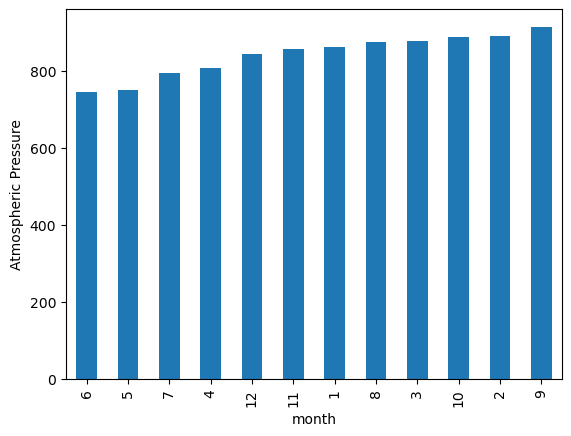

In [19]:
# Plotting the average pressure by month in ASCENDING order
asc_avg_pressure_by_month = avg_pressure_by_month.sort_values().reset_index()
plt.bar(x = asc_avg_pressure_by_month.index,
        height = asc_avg_pressure_by_month['pressure'],
        tick_label = asc_avg_pressure_by_month['month'],
        width = 0.5)
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation = 'vertical')
plt.xlim(-0.5, 11.5)
plt.show()

# The chart confirms what we see in the numbers: 6 has the lowest pressure and 9 has the highest

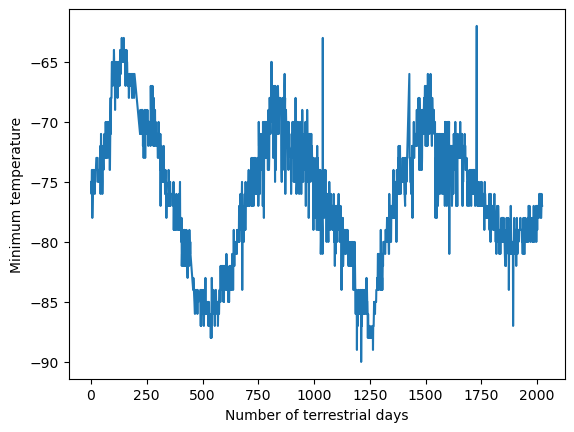

In [20]:
# Question 5. About how many terrestrial (earth) days are there in a Martian year?
# Answer: The second peak-to-peak distance is roughly 1500-800, so a year on Mars is about 700 terrestrial days
# (According to NASA's Jet Propulsion Laboratory website at
# https://www.jpl.nasa.gov/edu/learn/video/mars-in-a-minute-how-long-is-a-year-on-mars/ one Martian year is 687
# terrestrial days)

# To estimate this, we'll plot the min_temp data for each terrestrial day
# Because the data isn't consecutive/uninterrupted, a list of the terrestrial day numbers from the earliest date
# in the data set equal to day 1 needs to be made

start_date = mars_weather_df.at[0, 'terrestrial_date']
terrestrial_day_number = []
for date in mars_weather_df['terrestrial_date']:
    terrestrial_day_number.append((date - start_date).days + 1)
    
# Appending the dataframe to include the list of terrestrial day numbers
mars_weather_df['terrestrial_day_number'] = terrestrial_day_number

# Plotting the min_temp data recorded on each terrestrial day
daily_min_temp_plot = mars_weather_df.plot.line(x = 'terrestrial_day_number',
                                                xlabel = 'Number of terrestrial days',
                                                y = 'min_temp',
                                                ylabel = 'Minimum temperature',
                                                legend = False)

### Summary of Questions and Answers

1. How many months exist on Mars?
    * 12
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
    * 1867
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
    * Coldest month on average: 3
    * Warmest month on average: 8
4. Which months have the lowest and the highest atmospheric pressure on Mars?
    * Month with lowest atmospheric pressure on average: 6
    * Month with highest atmospheric pressure on average: 9
5. About how many terrestrial (Earth) days exist in a Martian year?
    * About 700

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Dropping the extra column before exporting the data
mars_weather_df = mars_weather_df.drop(columns = ['terrestrial_day_number'])

# Write the data to a .csv file of the dataframe to the current directory
mars_weather_df.to_csv('Output/mars_weather.csv', index = False, header = True)

In [22]:
browser.quit()